# Jupyter Notebook for Formula 1 Data Analysis and Predictive Modeling

---



**Objectives:**

Perform Exploratory Data Analysis to unveil insights and patterns within the Formula 1 dataset.

Apply Data Science methodologies to extract meaningful features and enhance the understanding of the Formula 1 landscape.

Classify driver standings based on historical achievements, using classification algorithms and evaluate model performance with accuracy metrics.

Create a regression model to predict a driver's finishing position in a race and evaluate the model using metrics such as MAE, MSE, and R-squared.

**Dataset Source:**

The dataset has been meticulously compiled from https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020, providing a rich and detailed resource for our analysis and modeling endeavors.


---



Initial set up and loading data:

In [ ]:
import subprocess
import pkg_resources
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

def check_install_libraries(libraries):
    for library in libraries:
        try:
            pkg_resources.require(library)
            print(f"'{library}' is already installed.")
        except pkg_resources.DistributionNotFound:
            print(f"'{library}' not found. Installing...")
            install(library)

# List of libraries to check and install
libraries_to_check = ['numpy', 'pandas', 'matplotlib', 'scikit-learn', 'seaborn', 'plotly', 'folium']

check_install_libraries(libraries_to_check)

'numpy' is already installed.
'pandas' is already installed.
'matplotlib' is already installed.
'scikit-learn' is already installed.
'seaborn' is already installed.
'plotly' is already installed.
'folium' is already installed.


In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PATH = 'drive/MyDrive/enpm808w/final/'

In [ ]:
# Reading the CSV Files
circuits = pd.read_csv(PATH + 'circuits.csv')
constructor_results = pd.read_csv(PATH + 'constructor_results.csv')
constructor_standings = pd.read_csv(PATH + 'constructor_standings.csv')
constructors = pd.read_csv(PATH + 'constructors.csv')
driver_standings = pd.read_csv(PATH + 'driver_standings.csv')
drivers = pd.read_csv(PATH + 'drivers.csv')
lap_times = pd.read_csv(PATH + 'lap_times.csv')
pit_stops = pd.read_csv(PATH + 'pit_stops.csv')
qualifying = pd.read_csv(PATH + 'qualifying.csv')
races = pd.read_csv(PATH + 'races.csv')
results = pd.read_csv(PATH + 'results.csv')
seasons = pd.read_csv(PATH + 'seasons.csv')
sprint_results = pd.read_csv(PATH + 'sprint_results.csv')
status = pd.read_csv(PATH + 'status.csv')



---



**Data Cleaning:**

1. Circuits

In [ ]:
# Drop 'url' column
circuits = circuits.drop(columns=['url'])

# Replace '\N' values with null values and drop those values
circuits['alt'] = circuits['alt'].replace('\\N', np.nan)
circuits = circuits.dropna(subset=['alt'])

# Convert 'alt' from object to int
circuits['alt'] = circuits['alt'].astype(int)

2. Constructor Results

In [ ]:
# Drop 'status' column
constructor_results = constructor_results.drop(columns=['status'])

3. Constructor Standings

In [ ]:
# Drop 'positionText' column
constructor_standings = constructor_standings.drop(columns=['positionText'])

4. Constructors

In [ ]:
# Drop 'url' column
constructors = constructors.drop(columns=['url'])

5. Driver Standings

In [ ]:
# Drop 'positionText' column
driver_standings = driver_standings.drop(columns=['positionText'])

6. Drivers

In [ ]:
# Drop 'url', 'number' and 'code' columns
drivers = drivers.drop(columns=['url'])
drivers = drivers.drop(columns=['number'])
drivers = drivers.drop(columns=['code'])

# Convert dob from object to date-time
drivers['dob'] = pd.to_datetime(drivers['dob'])

8. Pit Stops

In [ ]:
# Function to convert str to date-time format
def convert_time_to_seconds(time_str):
    try:
        # Check if ':' is in the string
        if ':' in time_str:
            minutes, seconds = time_str.split(':')
            return float(minutes) * 60 + float(seconds)
        else:
            # If ':' is not in the string, it's already a float
            return float(time_str)
    except ValueError:
        # Handle the case where the string is not a valid time string or float
        return None

# Apply this function to each entry in the 'duration' column
pit_stops['duration'] = pit_stops['duration'].apply(convert_time_to_seconds)
# Convert 'duration' from object to float
pit_stops['duration'] = pit_stops['duration'].astype(float)

11. Results

In [ ]:
# Drop 'psitionText' and 'positionOrder' column
results = results.drop(columns=['positionText'])
# results = results.drop(columns=['positionOrder'])

12. Seasons

In [ ]:
# Drop 'url' column
seasons = seasons.drop(columns=['url'])

13. Sprint Results

In [ ]:
# Drop 'positionText' column
sprint_results = sprint_results.drop(columns=['positionText'])

# Replace '\N' values with null values and drop those values
sprint_results['position'] = sprint_results['position'].replace('\\N', np.nan)
sprint_results['milliseconds'] = sprint_results['milliseconds'].replace('\\N', np.nan)
sprint_results = sprint_results.dropna(subset=['position'])
sprint_results = sprint_results.dropna(subset=['milliseconds'])

# Changing datatype of position and millisecond to int and float
sprint_results['position'] = sprint_results['position'].astype(int)
sprint_results['milliseconds'] = sprint_results['milliseconds'].astype(float)



---



**Exploratory Data Analysis:**

Merging certain features to explore the intricate relationships between driver performance, race outcomes, and other relevant factors:

In [ ]:
# Merging datasets
con1 = pd.merge(results, races, on ='raceId')
con2 = pd.merge(con1, drivers, on = 'driverId')
con3 = pd.merge(con2, driver_standings, on = 'driverId')
con4 = pd.merge(con3, constructors, on ='constructorId')
df = pd.merge(con4, status, on ='statusId')
pd.get_option("display.max_columns",None)

20

In [ ]:
# Drop unwanted columns
df = df.drop(['position_x'],1)

<ipython-input-22-8c4eaf965a6e>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['position_x'],1)


In [ ]:
# Changing column names
col_name = {'number_x':'number','milliseconds':'timetaken_in_millisec','fastestLapSpeed':'max_speed',
 'name_x':'grand_prix','number_y':'driver_num','code':'driver_code','nationality_x':'nationality','name_y':'company',
 'raceId_x':'racerId','points_x':'points','position_y':'position'}

df.rename(columns=col_name,inplace=True)

In [ ]:
# Concatenating driver forename and surname into a single feature
df['driver_name'] = df['forename']+' '+df['surname']
df = df.drop(['forename','surname'],1)

<ipython-input-24-44a866eefc84>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['forename','surname'],1)


In [ ]:
pd.to_datetime(df.dob)
df['dob'] = pd.to_datetime(df['dob'])

Extracting Age from the DOB column to do further analysis:

In [ ]:
from datetime import datetime

# Calculate driver age and add as new column
dates = datetime.today()-df['dob']
age = dates.dt.days/365

df['age'] = round(age)
pd.set_option('display.max_columns', None)
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,time_x,timetaken_in_millisec,fastestLap,rank,fastestLapTime,max_speed,statusId,year,round,circuitId,grand_prix,date,time_y,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,driverRef,dob,nationality,driverStandingsId,raceId_y,points_y,position,wins,constructorRef,company,nationality_y,status,driver_name,age
0,1,18,1,1,22,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,hamilton,1985-01-07,British,1,18,10.0,1,1,mclaren,McLaren,British,Finished,Lewis Hamilton,39.0
1,1,18,1,1,22,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,hamilton,1985-01-07,British,9,19,14.0,1,1,mclaren,McLaren,British,Finished,Lewis Hamilton,39.0
2,1,18,1,1,22,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,hamilton,1985-01-07,British,27,20,14.0,3,1,mclaren,McLaren,British,Finished,Lewis Hamilton,39.0
3,1,18,1,1,22,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,hamilton,1985-01-07,British,48,21,20.0,2,1,mclaren,McLaren,British,Finished,Lewis Hamilton,39.0
4,1,18,1,1,22,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,hamilton,1985-01-07,British,69,22,28.0,3,1,mclaren,McLaren,British,Finished,Lewis Hamilton,39.0


Using the ‘folium’ library to create an interactive map using Leaflet.
Every circuit in the world at which F1 has raced has been displayed in the map:

In [ ]:
# Using folium to display the circuits on a world map
import folium
from IPython.display import display
coordinates=[]
for lat,lng in zip(circuits['lat'],circuits['lng']):
    coordinates.append([lat,lng])
maps = folium.Map(zoom_start=1,tiles='openstreetmap', max_zoom=23, control_scale=True)  #map_types (Stamen Terrain, Stamen Toner, Mapbox Bright, cartodbpositron)
for i,j in zip(coordinates,circuits.name):
    marker = folium.Marker(
        location=i,
        icon=folium.Icon(icon="car",color='cadetblue',prefix='fa'),
        popup="<strong>{0}</strong>".format(j))  #strong is used to bold the font (optional)
    marker.add_to(maps)
display(maps)

Used a heatmap which displays the correlation coefficients between various     racing-related  variables, with colors indicating the strength and direction of the relationship:

<ipython-input-28-aa56b33db9f1>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


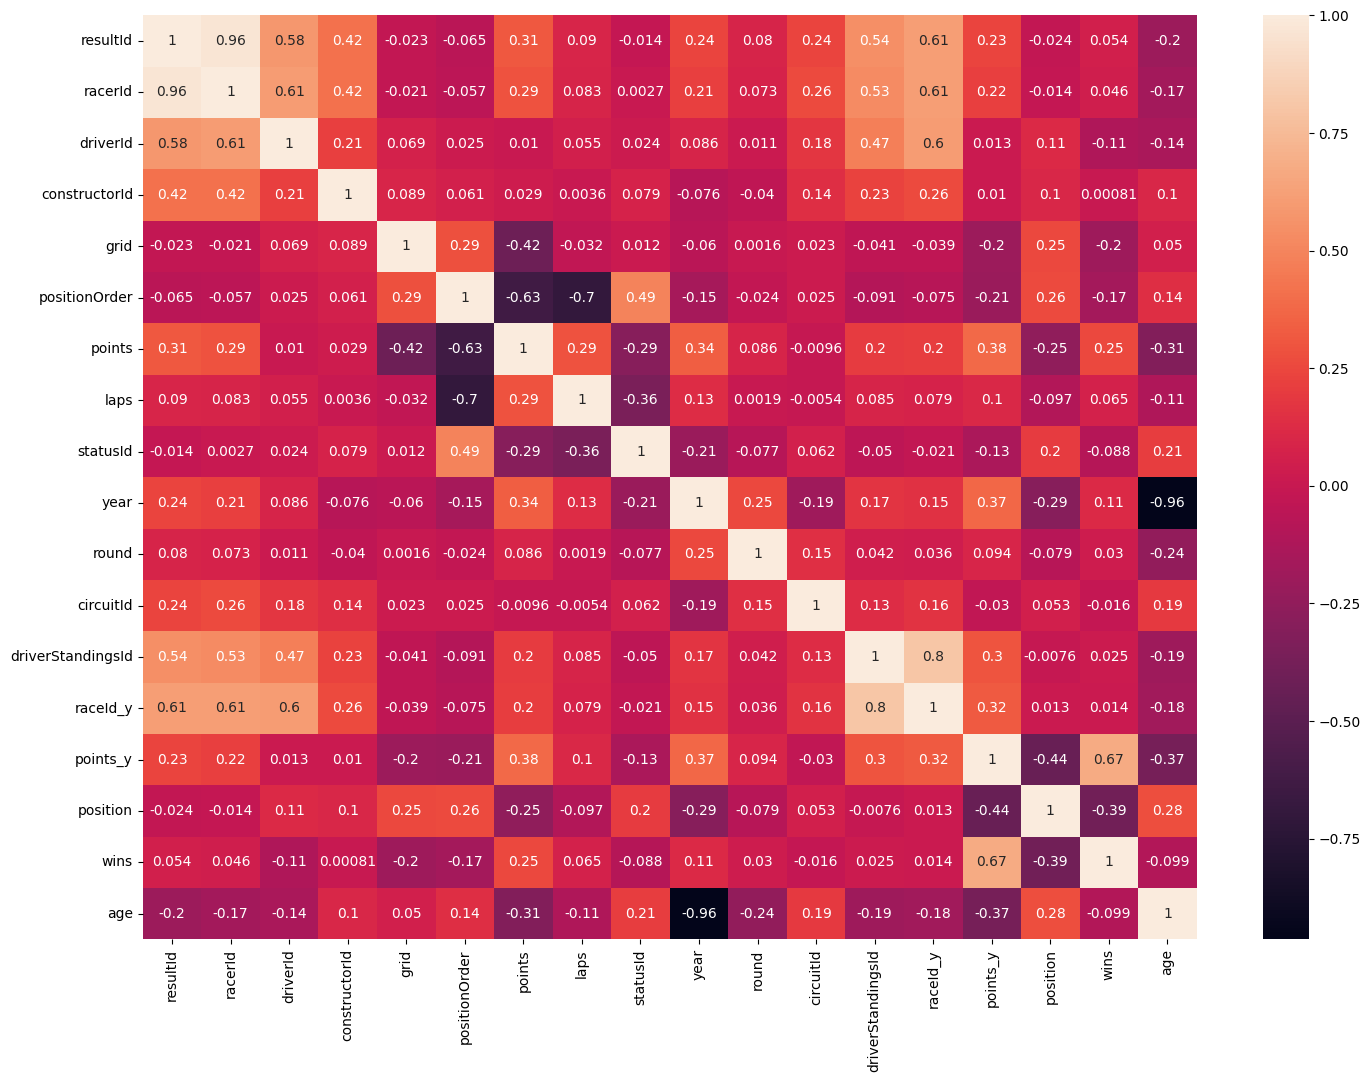

In [ ]:
# Correlation Heatmap
import seaborn as sns
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
# Check for skewness
df.skew()

<ipython-input-29-3353b6ad830b>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


resultId             0.108256
racerId              0.218129
driverId             1.567379
constructorId        1.930009
grid                 0.433818
positionOrder        0.461712
points               2.331402
laps                -0.107792
statusId             2.881861
year                -0.433695
round                0.237809
circuitId            1.326908
driverStandingsId   -0.103283
raceId_y             0.209778
points_y             3.288832
position             1.764488
wins                 3.868041
age                  0.464746
dtype: float64



---



**Visualizations:**

Exploring features to generate insightful visualizations tailored to both drivers and constructors specifically. Uncover patterns, relationships, and performance metrics that illuminate the unique dynamics of individual drivers and constructor teams within the Formula 1 ecosystem:

In [ ]:
results_copy_df = results.copy()

In [ ]:
drivers_df = drivers.copy()
# drivers_df =drivers_df.drop(columns =['driverRef', 'number', 'code', 'url'])
drivers_df['driver_name'] = drivers_df['forename'] + ' ' + drivers_df['surname']
drivers_df = drivers_df.drop(columns =['forename', 'surname'])

In [ ]:
# Driver and constructor specific visualizations
merged_df = results_copy_df.merge(status , on = 'statusId')
merged_df = merged_df.merge(races, on = 'raceId')
merged_df = merged_df.merge(drivers_df, on = 'driverId')
merged_df = merged_df.merge(constructors, on = 'constructorId')
merged_df = merged_df.merge(circuits , on = 'circuitId')

In [ ]:
merged_df = merged_df.rename(columns= {'nationality_x':'driver_nationality','nationality_y':'constructor_nationality'})
merged_df.describe()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId,year,round,circuitId,lat,lng,alt
count,26020.000000,26020.000000,26020.000000,26020.000000,26020.000000,26020.000000,26020.000000,26020.000000,26020.000000,26020.000000,26020.000000,26020.000000,26020.000000,26020.000000,26020.000000
mean,13012.423866,535.449769,265.244466,48.952575,11.169985,12.859570,1.899272,46.055919,17.499039,1990.480630,8.364873,23.414374,34.105668,5.733769,277.157955
std,7514.476652,302.268110,271.669285,60.100330,7.235114,7.703135,4.207217,29.755220,26.139839,19.472504,4.943152,18.583306,25.340578,57.059456,405.291191
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1950.000000,1.000000,1.000000,-37.849700,-118.189000,-7.000000
25%,6505.750000,294.000000,57.000000,6.000000,5.000000,6.000000,0.000000,22.000000,1.000000,1976.000000,4.000000,9.000000,34.843100,-1.016940,18.000000
50%,13010.500000,517.000000,163.000000,25.000000,11.000000,12.000000,0.000000,52.000000,10.000000,1991.000000,8.000000,18.000000,44.048100,6.947500,153.000000
75%,19515.250000,789.000000,364.000000,58.000000,17.000000,18.000000,2.000000,66.000000,14.000000,2007.000000,12.000000,34.000000,49.254200,14.764700,401.000000
max,26085.000000,1110.000000,858.000000,214.000000,34.000000,39.000000,50.000000,200.000000,141.000000,2023.000000,22.000000,77.000000,57.265300,144.968000,2227.000000


Representing all the drivers to have raced in F1 so far in terms of their nationalities. It is observed that a huge chunk of drivers were British, American and Italian which is where the major teams are based:

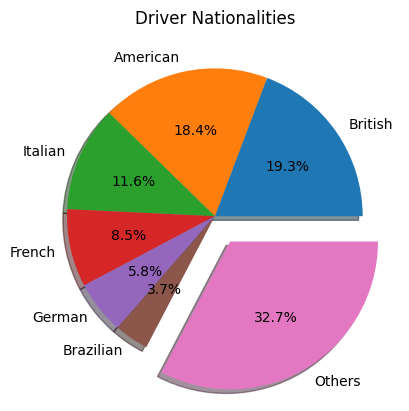

In [ ]:
#  Group the merged data frame by the driver nationality column, then count the number of unique driver names in each group
driver_country = merged_df.groupby('driver_nationality').driver_name.nunique().reset_index()

driver_country = driver_country.rename(columns = {'driver_name': 'driver_counts'})

# Create a new data frame driver_country1 that only includes rows where the driver_counts column is greater than or equal to 30.
driver_country1 = driver_country[driver_country.driver_counts >= 30].sort_values('driver_counts' ,ascending = False )

# Add a new row to the driver_country1 data frame that represents all driver nationalities that are not included in the filtered data frame.
driver_country1.loc[len(driver_country1.index)] = ['Others', (driver_country.driver_counts.sum() - driver_country1.driver_counts.sum())]


plt.title('Driver Nationalities')

myexplode = [0,0,0,0,0,0,0.2]

plt.pie(driver_country1.driver_counts, labels= driver_country1.driver_nationality, autopct='%1.1f%%', explode= myexplode, shadow=True, startangle=360 );

Creating a pie chart to display the percentage of world champions from different nationalities after merging information about drivers, driver standings and races.
It was found that the UK, Germany and Brazil have the most world champions, a whopping 43%:

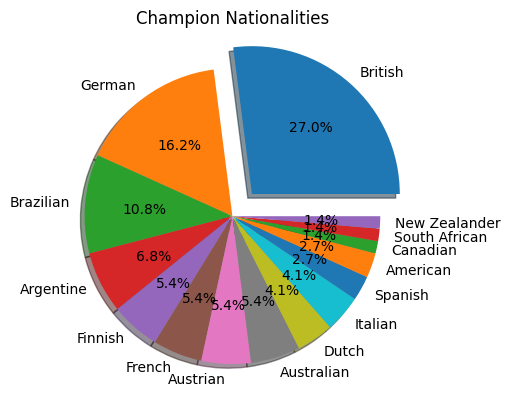

In [ ]:
# Visualising champions by nationalities
import plotly.graph_objects as go

driver_position = drivers_df.merge(driver_standings,left_on='driverId',right_on='driverId',how = 'left')
driver_position = driver_position.merge(races,on = 'raceId',how = 'left')
champions = driver_position.groupby(['nationality','year','name'])[['points','wins']
                                            ].max().sort_values('points',ascending = False).reset_index()
champions.drop_duplicates(subset=['year'], inplace=True)
champion_nations = champions.nationality.value_counts().to_frame()
myexplode = [0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
plt.title('Champion Nationalities')
plt.pie(champion_nations['nationality'], labels= champion_nations.index, autopct='%1.1f%%', explode= myexplode, shadow=True, startangle=360 );

Craeating a table to show the percentage of drivers from each country who went on to become world champions. Finland and Brazil lead the way with 33% and 18% respectively:

In [ ]:
champion_drivers = driver_position.groupby(['nationality','year','name'])[['points','wins']
                                            ].max().sort_values('points',ascending = False).reset_index()
champion_drivers.drop_duplicates(subset=['year'], inplace=True)
final = champion_drivers.groupby('nationality')['name'].nunique().reset_index(name = 'champions').sort_values(
    by='champions',ascending = False)
driver_country = driver_country.rename(columns = {'driver_nationality': 'nationality'})

ratios = final.merge(driver_country,on='nationality',how='inner')
ratios['percentage_of_winners'] = (ratios.champions/ratios['driver_counts']*100).round(2)
ratios = ratios.sort_values('percentage_of_winners',ascending = False)
ratios.head(10)

,nationality,champions,driver_counts,percentage_of_winners
4,Finnish,3,9,33.33
1,Brazilian,6,32,18.75
3,Argentine,4,24,16.67
7,Austrian,2,15,13.33
10,Spanish,2,15,13.33
6,Australian,2,18,11.11
8,Dutch,2,18,11.11
13,New Zealander,1,9,11.11
2,German,5,50,10.00
12,Canadian,1,14,7.14


Visualising the percentage of winners per country (normalised to a total of 100, to fit in a pie chart). We can analyse the success ratios of participating countries from the representation:

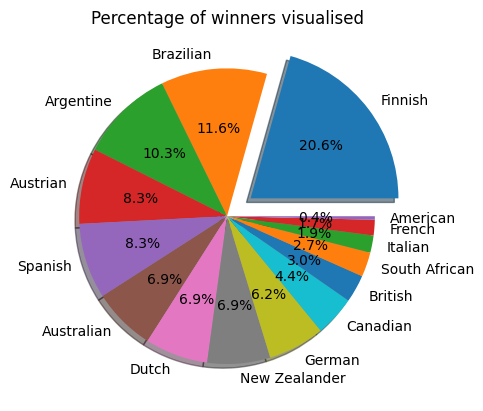

In [ ]:
plt.title('Percentage of winners visualised')
myexplode = [0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
plt.pie(ratios['percentage_of_winners'], labels= ratios.nationality, autopct='%1.1f%%',explode= myexplode, shadow=True, startangle=360 );

Using df.groupby to show the constructors with the most points each year. Mercedes lead the way with a whopping 765 points in 2016 and occupy 4 of the top 5 spots with brilliant performances in 2019, 2015 and 2014 too:

In [ ]:
# Most successful constructors by year w.r.t points

best = merged_df[['name_y','points','raceId', 'year']]
best = best.groupby(['name_y', 'year'])['points'].sum().sort_values(ascending=False).reset_index(name = 'points')
best

,name_y,year,points
0,Mercedes,2016,765.0
1,Mercedes,2019,739.0
2,Mercedes,2015,703.0
3,Mercedes,2014,701.0
4,Red Bull,2022,686.0
...,...,...,...
1096,Lola,1985,0.0
1097,Lola,1993,0.0
1098,Lola,1997,0.0
1099,AFM,1953,0.0


Tabulating the most successful constructors over the years. Ferrari and Mclaren lead the way followed by Mercedes and Williams:

In [ ]:
temp = constructor_standings.loc[constructor_standings['position'] == 1]
temp = pd.merge(constructors, temp, on ='constructorId')
successful_constructors = temp.groupby('name')['position'].count().sort_values(ascending=False).reset_index(name = 'wins')
successful_constructors.head(5)

,name,wins
0,Ferrari,234
1,McLaren,165
2,Mercedes,145
3,Williams,114
4,Red Bull,98


A bar graph is also plotted to ease the visual:

In [ ]:
fig = go.Figure(
    data=[go.Bar(x = successful_constructors["name"], y=successful_constructors["wins"])],
    layout_title_text="Top constructors throughout history by number of wins"

)
fig.show()

Creating a table depicting the teams having most wins in the 2022 season. RedBull and Ferrari occupy the top 2 spots with 17 and 5 wins each:

In [ ]:
# Top F1 drivers of 2022
5
top = pd.merge(constructors, temp, on ='constructorId')
top = pd.merge(races, top, on ='raceId')
top = top.loc[top['position'] == 1]
top = top.loc[top['year'] == 2022]
final = top.groupby('name_y')['position'].count().sort_values(ascending=False).reset_index(name = 'wins')
final.head(5)

,name_y,wins
0,Red Bull,17
1,Ferrari,5


Used df.groupby to depict the most successful drivers in F1 based on wins. Lewis Hamilton tops the list followed by Michael Schumacher:

In [ ]:
temp = driver_standings.loc[driver_standings['position'] == 1]
temp = pd.merge(drivers, temp, on ='driverId')
temp['driver_name'] = temp['forename']+' '+temp['surname']
temp = temp.drop(['forename','surname'],1)
successful_drivers = temp.groupby('driver_name')['position'].count().sort_values(ascending=False).reset_index(name = 'wins')
successful_drivers.head(5)

<ipython-input-42-5aaaa3934f0f>:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



,driver_name,wins
0,Lewis Hamilton,125
1,Michael Schumacher,121
2,Alain Prost,79
3,Sebastian Vettel,63
4,Fernando Alonso,52


A bar graph is also plotted to ease the visual:

In [ ]:
fig = go.Figure(
    data=[go.Bar(x = successful_drivers["driver_name"], y=successful_drivers["wins"])],
    layout_title_text="Top drivers throughout history by number of wins"

)
fig.show()

Used df.groupby to depict the most successful drivers in F1 based on wins for the year 2014 only:

In [ ]:
# Top F1 drivers of 2014

top = pd.merge(drivers, temp, on ='driverId')
top = pd.merge(races, top, on ='raceId')
top = top.loc[top['position'] == 1]
top = top.loc[top['year'] == 2014]
top['driver_name'] = top['forename']+' '+top['surname']
top = top.drop(['forename','surname'],1)
final = top.groupby('driver_name')['position'].count().sort_values(ascending=False).reset_index(name = 'wins')
final.head(5)

<ipython-input-44-adc7a6aa5d50>:8: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



,driver_name,wins
0,Nico Rosberg,12
1,Lewis Hamilton,7




---



**Classification:**

The goal is to predict Formula 1 drivers based on a set of carefully chosen features from the dataset. The inclusion of both categorical and numerical features ensures a comprehensive representation of the drivers' characteristics.

The decision to use a **Decision Tree Classifier** stems from its ability to capture complex relationships within the data, providing an interpretable and easy to visualize model. To handle categorical variables effectively, a **OneHotEncoder** is employed within a preprocessing pipeline.


This script provides a foundation for building and evaluating a Decision Tree Classifier for predicting driver names based on the specified features in the Formula 1 dataset and also measures the accuracy of the predictions:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer as encoder
from sklearn.pipeline import Pipeline

included_columns = [
    'resultId', 'constructorId', 'number', 'grid',
    'positionOrder', 'points', 'laps', 'timetaken_in_millisec', 'fastestLap',
    'rank', 'max_speed', 'nationality',
    'position', 'wins', 'status', 'driver_name'
]

# Filter DataFrame to include only the specified columns if they exist
merged_df = merged_df[list(set(included_columns) & set(merged_df.columns))]

#print(merged_df.head())

X = merged_df.drop('driver_name', axis=1)  # Assuming 'driver_name' is the target variable
y = merged_df['driver_name']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Perform one-hot encoding for categorical columns
encoded_columns = encoder(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)

# Create a pipeline with the preprocessor and decision tree classifier
decesion_tree_model = Pipeline([
    ('preprocessor', encoded_columns),
    ('classifier', DecisionTreeClassifier())
])

# Train the classifier
decesion_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decesion_tree_model.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display predicted driver names for the test set
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions_df.head())

Accuracy: 0.7965026902382782
                 Actual         Predicted
2981   Daniel Ricciardo  Daniel Ricciardo
20899   François Cevert    Jackie Stewart
2214       Felipe Massa      Felipe Massa
12586  Daniel Ricciardo  Daniel Ricciardo
19448     Mike Hawthorn     Mike Hawthorn




---



**Regression:**

This script processes Formula 1 race data to predict drivers' finishing positions. It merges and refines data from race results, driver standings, and constructor standings, and filters it based on specific criteria. The script uses a RandomForestRegressor model to predict finishing positions based on grid position, driver standing, and constructor standing. It evaluates the model's performance with standard metrics and includes a function for users to input values and receive a predicted finishing position.

In [ ]:
# Take required columns
results = results[["raceId", "driverId", "constructorId", "grid", "position"]]
results.head()
driver_standings = driver_standings[["raceId", "driverId", "position"]]

# Rename the "position" column to avoid conflict with the "position" column from results.csv
driver_standings = driver_standings.rename(columns={"position": "driverStanding"})

# Use current driver standings for the next race
driver_standings["raceId"] += 1
driver_standings.head()

# Again, picking the columns we need and renaming "position"
constructor_standings = constructor_standings[["raceId", "constructorId", "position"]]
constructor_standings = constructor_standings.rename(columns={"position": "constructorStanding"})

# Use current constructor standings for the next race
constructor_standings["raceId"] += 1
constructor_standings.head()

# Joining results with driver standings. This will add the "driverPosition" column to our results
results_driver_standings = pd.merge(results, driver_standings, on=["raceId", "driverId"], how="inner")
results_driver_standings.head()

# Joining constructor standings and we end up with everything we need in one place
joined_data = pd.merge(results_driver_standings, constructor_standings, on=["raceId", "constructorId"], how="inner")
joined_data.head()
joined_data.sort_values(by='raceId', ascending=False).head(60)

# Finding out the first race ID of the year 2013 to filter out races older than 10 years
races.loc[races['year'] == 2013].sort_values(by="raceId", ascending=True).head()

# Removing all races before 2013 from our dataset
joined_data = joined_data[joined_data["raceId"] > 880]
joined_data.head()

# Getting rid of a few more columns that we don't need anymore
dataset = joined_data[["grid", "driverStanding", "constructorStanding", "position"]]
joined_data.head()
dataset.info()

# Filter out rows where the position is not numeric (remember the "\N" before?)
dataset = dataset[dataset.position.apply(lambda x: x.isnumeric())]

# Filter out rows where grid is 0
dataset = dataset[dataset.grid.apply(lambda x: x > 0)]

# Change type for position values to integers
dataset.position = dataset.position.astype('int')

max_grid = dataset.grid.max()
max_position = dataset.position.max()
max_d_position = dataset.driverStanding.max()
max_c_position = dataset.constructorStanding.max()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4115 entries, 18241 to 22356
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   grid                 4115 non-null   int64 
 1   driverStanding       4115 non-null   int64 
 2   constructorStanding  4115 non-null   int64 
 3   position             4115 non-null   object
dtypes: int64(3), object(1)
memory usage: 160.7+ KB


In [ ]:
X = dataset[['grid', 'driverStanding', 'constructorStanding']]
y = dataset['position']

In [ ]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of trees and other parameters

# Train the model
rf_model.fit(X_train.values, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test.values)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 11.631618371909305
Mean Absolute Error: 2.607879756074497
R-squared: 0.5863703304454613


In [ ]:
def predict_rf(grid, driver_standing, constructor_standing, model):
    prediction = model.predict([[grid, driver_standing, constructor_standing]])
    return np.round(prediction).astype(int)

# Asking user for input
driver = str(input("Enter name of desired driver: "))
grid = int(input("Enter grid position: "))
driver_standing = int(input("Enter driver standing: "))
constructor_standing = int(input("Enter constructor standing: "))

# Making a prediction
prediction = predict_rf(grid, driver_standing, constructor_standing, rf_model)
print("Name of Driver: ", driver)
print(f"Predicted finishing position: {prediction}")

Enter name of desired driver: Lewis Hamilton
Enter grid position: 11
Enter driver standing: 3
Enter constructor standing: 2
Name of Driver:  Lewis Hamilton
Predicted finishing position: [8]




---



**Conclusion:**

In this extensive exploration of the Formula 1 World Championship datasets, we embarked on a journey of data cleaning, merging, and visualization to extract meaningful insights. The dataset, comprising 14 files covering various aspects of F1, provided a rich source for comprehensive analyses.

*Data Cleaning and Merging*:
We meticulously addressed data inconsistencies, handled null values, and standardized formats across multiple files. The merging process enabled the creation of a cohesive dataset that integrated information about circuits, constructors, drivers, races, and more.

*Visualizations*:
A diverse range of visualizations illuminated different facets of the F1 world. From an interactive map showcasing F1 circuits globally to heatmaps revealing correlations between racing variables, the visualizations offered a nuanced understanding of the sport. Driver nationalities, championship percentages, and constructor victories were vividly represented through charts and tables, adding layers of insights.

*Classification Project*:
The classification project aimed to predict F1 drivers based on carefully selected features. Leveraging a Decision Tree Classifier, we handled categorical variables effectively using OneHotEncoding. The resulting model achieved an accuracy of 80%, demonstrating the potential of data-driven approaches to predict driver classifications.

*Regression Project*:
The regression project harnessed Formula 1 race data to predict drivers' finishing positions. By merging and refining race results, driver standings, and constructor standings, the script utilized a RandomForestRegressor model. Key predictors like grid position, driver standing, and constructor standing were instrumental in crafting a reliable predictive model. Evaluation through standard metrics ensures the model's effectiveness, and a user-friendly function allows easy input for predicted finishing positions.

*Key Findings*:



*   The dominance of certain nationalities among F1 drivers and champions, with the UK, Germany, and Brazil leading.
*   Ferrari and Mclaren emerged as the most successful constructors, both historically and year-wise.
*   Mercedes consistently secured top positions in constructor standings, especially in 2016 with a remarkable 765 points.
*   RedBull and Ferrari dominated the 2022 season in terms of wins.


*Challenges and Future Exploration*:


Addressing challenges such as null values and data inconsistencies was crucial in ensuring the reliability of our analyses. Future exploration could delve into more advanced machine learning techniques, ensemble models, and feature engineering to enhance predictive accuracy. Additionally, incorporating real-time data and expanding the temporal scope could yield more dynamic insights.

In conclusion, this journey through the Formula 1 datasets unveiled the intricate dynamics of one of the most thrilling sports globally. The combination of data cleaning, visualization, and machine learning showcased the potential for data-driven approaches to deepen our understanding of Formula 1, setting the stage for further exploration and refinement of predictive models in the future.